In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
%ls

diabetes_012_health_indicators_updated.csv  sample_data/


In [ ]:
# Read the CSV file 'diabetes_012_health_indicators_updated.csv' into a DataFrame
df = pd.read_csv('diabetes_012_health_indicators_updated.csv')

# Create a new DataFrame using the read data
df = pd.DataFrame(df)

In [ ]:
# Display a random sample (single row) from the DataFrame 'df'
df.sample()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
117834,117834,0.0,1.0,No,1.0,25.0,Yes,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,No,male,52.0,4.0,8.0


**Data Preprocessing**

In [ ]:
# Create a new column 'Diabetes_01' in the DataFrame 'df' and assign the values from the 'Diabetes_012' column
df['Diabetes_01'] = df.loc[:, 'Diabetes_012']

In [ ]:
df.sample()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_01
52542,52542,0.0,1.0,No,1.0,30.0,Yes,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,No,male,35.0,4.0,5.0,0.0


In [ ]:
# Replace values in the 'Diabetes_01' column of the DataFrame 'df'
df['Diabetes_01'].replace([1, 2], [1, 1], inplace=True)

In [ ]:
# Display information about the DataFrame 'df', including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            253680 non-null  int64  
 1   Diabetes_012          253680 non-null  float64
 2   HighBP                253680 non-null  float64
 3   HighChol              253680 non-null  object 
 4   CholCheck             253680 non-null  float64
 5   BMI                   253680 non-null  float64
 6   Smoker                253680 non-null  object 
 7   Stroke                253680 non-null  float64
 8   HeartDiseaseorAttack  253680 non-null  float64
 9   PhysActivity          253680 non-null  float64
 10  Fruits                253680 non-null  object 
 11  Veggies               253680 non-null  object 
 12  HvyAlcoholConsump     253680 non-null  float64
 13  AnyHealthcare         253680 non-null  float64
 14  NoDocbcCost           253680 non-null  float64
 15  

In [ ]:
# Drop specified columns ('Unnamed: 0', 'AnyHealthcare', 'NoDocbcCost') from the DataFrame 'df'
df = df.drop(['Unnamed: 0', 'AnyHealthcare', 'NoDocbcCost'], axis=1)

In [ ]:
# Replace values in specific columns of the DataFrame 'df' as a step of pre-processing
df['HighChol'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['DiffWalk'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Veggies'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Fruits'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Smoker'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)

In [ ]:
def up_sample():
    from sklearn.utils import resample

    # Separate majority and minority classes
    df_majority = df[df.Diabetes_01 == 0]
    df_minority = df[df.Diabetes_01 == 1]

    # Upsample the minority class to match the majority class
    df_minority_upsampled = resample(df_minority,
                                     replace=True,      # Sample with replacement
                                     n_samples=213703,  # Number of samples to match the majority class
                                     random_state=123)  # For reproducible results

    # Concatenate the upsampled minority class with the majority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])

    # Display the count of each class after upsampling
    df_upsampled.Diabetes_01.value_counts()

    # Separate features (x) and target variable (y) in the upsampled DataFrame
    y = df_upsampled.Diabetes_01
    x = df_upsampled.drop(["Diabetes_01", "Diabetes_012"], axis=1)


In [ ]:
def down_sample():
    from sklearn.utils import resample

    # Separate majority and minority classes
    df_majority = df[df.Diabetes_01 == 0]
    df_minority = df[df.Diabetes_01 == 1]

    # Downsample the majority class to match the minority class
    df_majority_downsampled = resample(df_majority,
                                       replace=False,      # Sample without replacement
                                       n_samples=39977,    # Number of samples to match the minority class
                                       random_state=123)   # For reproducible results

    # Concatenate the downsampled majority class with the minority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])

    # Display the count of each class after downsampling
    df_downsampled.Diabetes_01.value_counts()

    # Separate features (x) and target variable (y) in the downsampled DataFrame
    y = df_downsampled.Diabetes_01
    x = df_downsampled.drop(["Diabetes_01", "Diabetes_012"], axis=1)


In [ ]:
# Separate features (x) and target variable (y) from the DataFrame 'df'
x = df.drop(["Diabetes_01", "Diabetes_012"], axis=1)
y = df['Diabetes_01']

In [ ]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# **Models**

### **Naive Bayes**

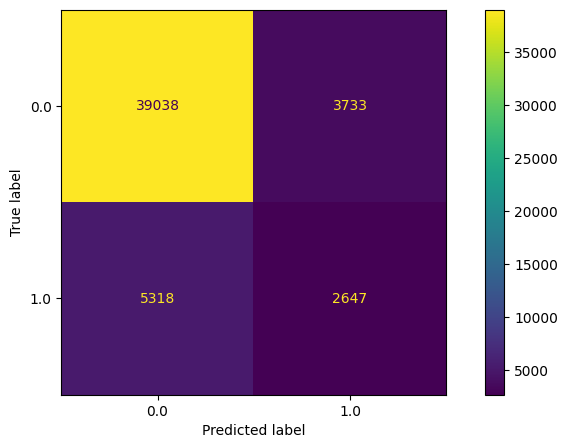

Bernoulli Naive Bayes model accuracy (in %): 82.16059602649007
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.880106     0.414890  0.821606      0.647498      0.807073
recall         0.912721     0.332329  0.821606      0.622525      0.821606
f1-score       0.896117     0.369048  0.821606      0.632583      0.813373
support    42771.000000  7965.000000  0.821606  50736.000000  50736.000000


In [ ]:
def naivebayes():
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn import metrics
    from sklearn.metrics import ConfusionMatrixDisplay

    # Instantiate the Bernoulli Naive Bayes classifier
    clf = BernoulliNB()

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Predict the target variable on the test data
    y_pred = clf.predict(x_test)

    # Display confusion matrix
    confusion_matrix(y_test, y_pred)

    # Compute confusion matrix and display it using ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

    # Display the accuracy of the Naive Bayes model
    print("Bernoulli Naive Bayes model accuracy (in %):", metrics.accuracy_score(y_test, y_pred) * 100)

    # Display classification report
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(report)

naivebayes()

### **Logistic Regression**

Logistic Regression model accuracy (in %): 84.72682119205298


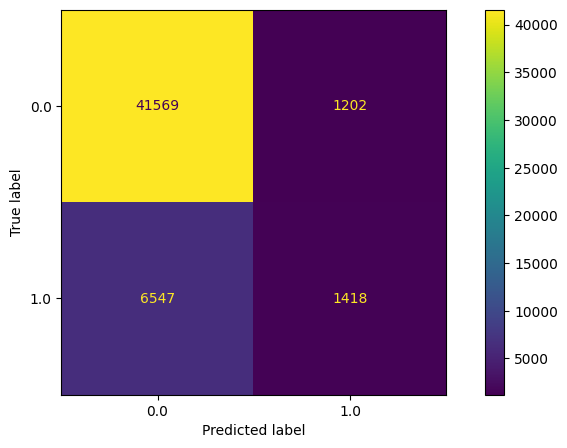

                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.863933     0.541221  0.847268      0.702577      0.813271
recall         0.971897     0.178029  0.847268      0.574963      0.847268
f1-score       0.914740     0.267926  0.847268      0.591333      0.813198
support    42771.000000  7965.000000  0.847268  50736.000000  50736.000000


In [ ]:
def logisticregression():
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.linear_model import LogisticRegression

    global x_train, x_test

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    scale = scaler.fit(x_train)
    x_train = scale.transform(x_train)
    x_test = scale.transform(x_test)

    # Instantiate the Logistic Regression classifier
    logreg = LogisticRegression()

    # Train the classifier on the standardized training data
    logreg.fit(x_train, y_train)

    # Predict the target variable on the standardized test data
    y_pred = logreg.predict(x_test)

    from sklearn import metrics
    # Display the accuracy of the Logistic Regression model
    print("Logistic Regression model accuracy (in %):", metrics.accuracy_score(y_test, y_pred) * 100)

    # Display confusion matrix
    confusion_matrix(y_test, y_pred)

    # Compute confusion matrix and display it using ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
    disp.plot()
    plt.show()

    # Display classification report
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(report)

logisticregression()

### **K-Neighbors Classifier**

Kneighbors Classifier model accuracy(in %): 84.74061810154525


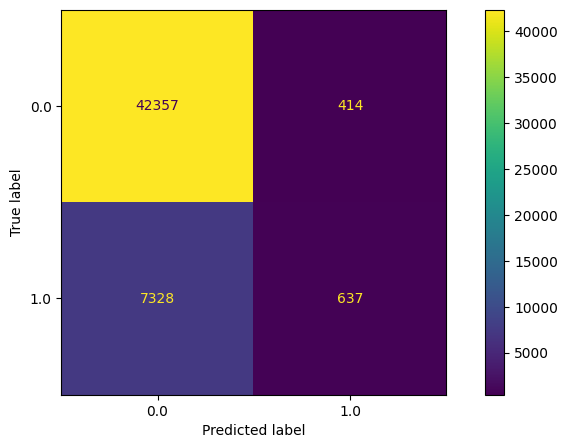

                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.852511     0.606089  0.847406      0.729300      0.813825
recall         0.990321     0.079975  0.847406      0.535148      0.847406
f1-score       0.916263     0.141304  0.847406      0.528784      0.794603
support    42771.000000  7965.000000  0.847406  50736.000000  50736.000000


<Figure size 1200x600 with 0 Axes>

In [ ]:
def kneighborsClassifier_bin(x_train, x_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Feature scaling
    sc_x = StandardScaler()
    X_train = sc_x.fit_transform(x_train)
    X_test = sc_x.transform(x_test)

    # Define the model: Initialize K-NN
    classifier = KNeighborsClassifier(n_neighbors=450, p=2, metric='euclidean')
    classifier.fit(X_train, y_train)

    # Predict the targets
    y_pred = classifier.predict(X_test)

    print("Kneighbors Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred) * 100)

    # Evaluate model
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()

    plt.show()

    plt.figure(figsize=(12, 6))

    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(report)

kneighborsClassifier_bin(x_train, x_test, y_train, y_test)

### **Decision Tree**

DT model accuracy(in %): 85.09933774834437
accuracy_score = 0.9224930229998727


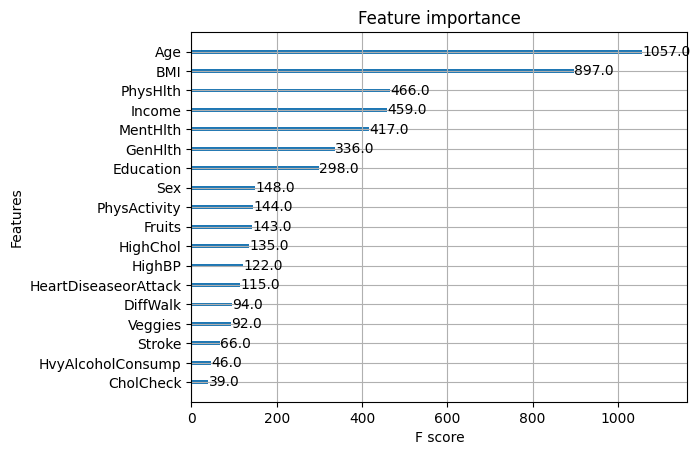

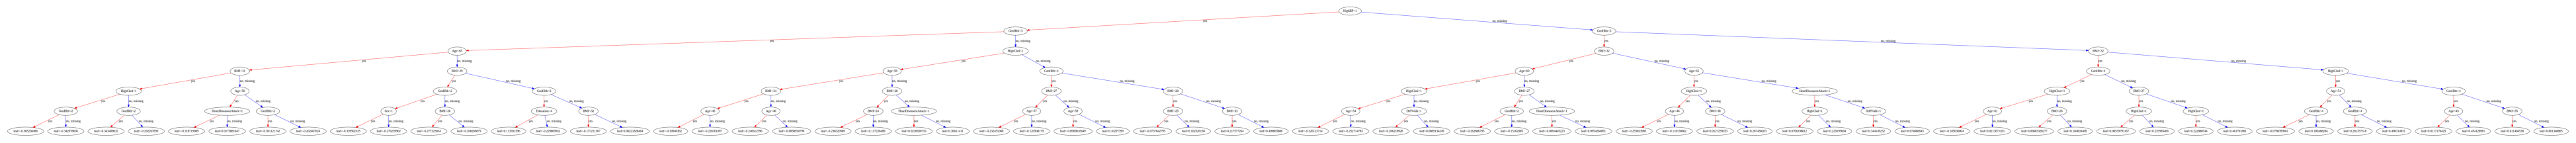

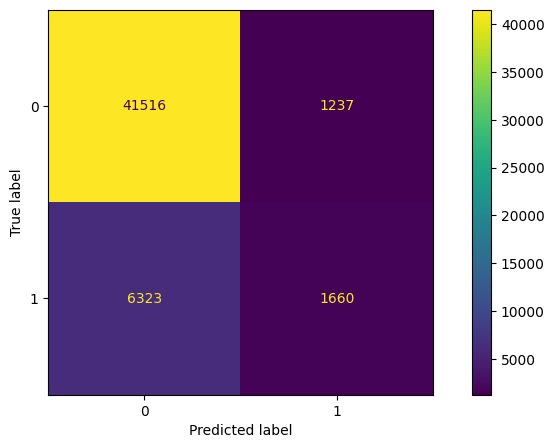

                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.867828     0.573007  0.850993      0.720417      0.821439
recall         0.971066     0.207942  0.850993      0.589504      0.850993
f1-score       0.916549     0.305147  0.850993      0.610848      0.820349
support    42753.000000  7983.000000  0.850993  50736.000000  50736.000000


In [ ]:
def decisiontree():
  from xgboost import XGBClassifier
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import  classification_report, accuracy_score
  from sklearn.preprocessing import LabelEncoder
  import numpy as np
  import pandas as pd

  model = XGBClassifier()

  # Label encode categorical columns
  le = LabelEncoder()
  categ = ['HighChol','Fruits','Veggies','DiffWalk','Smoker','Sex']
  df[categ] = df[categ].apply(le.fit_transform)

  # Fit the XGBoost model on training data
  model.fit(x_train, y_train)

  # Predict the targets
  y_pred = model.predict(x_test)
  rmse = np.sqrt(accuracy_score(y_test, y_pred))

  from sklearn import metrics
  # Display the accuracy of the XGBoost model
  print("DT model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  print(f"accuracy_score = {rmse}")

  # Plot feature importance
  import matplotlib.pyplot  as plt
  from xgboost import plot_importance
  plot_importance(model)
  plt.rcParams['figure.figsize'] = [50, 500]
  plt.show()

  # Plot the first tree
  import xgboost as xgb
  xgb.plot_tree(model)
  plt.rcParams['figure.figsize'] = [10, 5]
  plt.show()


  from sklearn.metrics import accuracy_score,confusion_matrix

  # Display confusion matrix
  cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  disp.plot()
  plt.show()

  report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
  print(report)

decisiontree()